In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import numpy as np 
import torch.optim as optim 
import sys 
import os 
import matplotlib.pyplot as plt

In [2]:
project_basedir=os.path.join('..','..')
project_basedir = os.path.abspath(project_basedir)
sys.path.insert(0,project_basedir)

In [3]:
from  tests.core.np import LinearModel 
model_w = np.array([[1, 3, -1], [0, -4, 2]])
model_b = np.array([[-3, 2]]).reshape((model_w.shape[0], 1))
model = LinearModel(model_w, model_b)

In [7]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(3,2) 

    def forward(self, x):
        return self.fc1(x) 

In [32]:
net = Net() 
input = torch.FloatTensor([[1, -1, 0]])
output = net(input)
target = torch.FloatTensor([[.5, .7]])
target = target.view(1, -1)
criteria = nn.MSELoss()
loss = criteria(output, target)
optimizer = torch.optim.SGD(net.parameters(), lr=.001)

In [33]:
epoch = 0 
losses = [] 
av = [] 
x_axis=[] 
x_losses = [] 
for x,y in model.data(40000,400):
    # Forward Propagation
    pyx = torch.from_numpy(x.T).float() 
    pyy = torch.from_numpy(y.T).float()
    y_pred = net(pyx)
    # Compute and print loss
    loss = criteria(y_pred, pyy)
    losses.append(loss.item()) 
    
    if epoch % 1 == 0 :
        x_axis.append(epoch)
        x_losses.append(loss.item())
        
    if epoch %5000 == 0 :
        last_100 = losses[-100:]
        average_l100 = sum(last_100) / len(last_100)
        av.append([epoch, average_l100])
        print('epoch: ', epoch,' loss: ', loss.item())
    # Zero the gradients
    optimizer.zero_grad()
    
    # perform a backward pass (backpropagation)
    loss.backward()
    
    # Update the parameters
    optimizer.step()
    epoch+=1
    
last_100 = losses[-100:]
average_l100 = sum(last_100) / len(last_100)
av.append([epoch, average_l100])
print("Final loss:{}".format(loss))
    
print('epoch: ', epoch,' loss: ', loss.item())

epoch:  0  loss:  2.7888753414154053
epoch:  5000  loss:  0.7475804090499878
epoch:  10000  loss:  0.3617004156112671
epoch:  15000  loss:  0.19344604015350342
epoch:  20000  loss:  0.1211494654417038
epoch:  25000  loss:  0.06836237758398056
epoch:  30000  loss:  0.036950141191482544
epoch:  35000  loss:  0.02512972615659237
Final loss:0.014452074654400349
epoch:  40000  loss:  0.014452074654400349


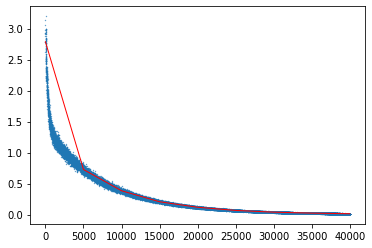

In [40]:
plt.scatter(x_axis, x_losses, s=.1)
av_np = np.array(av)
plt.plot(av_np[:,0], av_np[:,1], linewidth=1, c='r')
plt.show()

In [41]:
print(net.fc1.weight.data)
print("------------")
print(net.fc1.bias.data)

tensor([[ 0.7227,  2.6677, -1.2036],
        [ 0.1572, -3.7210,  2.0929]])
------------
tensor([-2.5735,  1.7225])
